In [ ]:
import numpy as np
import pandas as pd

In [ ]:
import keras
(train_X, train_y), (test_X, test_y) = keras.datasets.mnist.load_data(path="mnist.npz")

In [ ]:
train_X.shape

(60000, 28, 28)

In [ ]:
test_X.shape

(10000, 28, 28)

In [ ]:
type(train_X)

numpy.ndarray

In [ ]:
np.isnan(train_y).sum()

0

In [ ]:
np.isnan(train_X).sum()

0

In [ ]:
train_X

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [ ]:
train_y

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [ ]:
train_X[0].shape

(28, 28)

In [ ]:
train_X.shape

(60000, 28, 28)

In [ ]:
train_X = train_X.reshape(train_X.shape[0], -1)
train_X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [ ]:
train_X.shape

(60000, 784)

In [ ]:
test_X = test_X.reshape(test_X.shape[0], -1)
test_X.shape

(10000, 784)

In [ ]:
train_X[0].shape

(784,)

In [ ]:
train_X[:, 0].shape

(60000,)

In [ ]:
train_X = train_X.T
test_X = test_X.T

In [ ]:
train_X = train_X/255.

In [ ]:
test_X = test_X/255.

In [ ]:
train_y

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [ ]:
train_X[0].shape

(60000,)

In [ ]:
import types
import h5py

In [ ]:
# 784 - 128 - 10

class NeuralNetwork():
  def __init__(self):
    self.w1 = np.random.rand(128, 784)
    self.b1 = np.random.rand(128, 1)
    self.w2 = np.random.rand(10, 128)
    self.b2 = np.random.rand(10, 1)

  def relu(self, z):
    return np.maximum(0, z)

  def softmax(self, z):
    exp_z = np.exp(z - np.max(z, axis=0, keepdims=True))
    return exp_z / np.sum(exp_z, axis=0, keepdims=True)


  def forward_propagation(self, X):
    A = X
    self.z1 = self.w1.dot(A) + self.b1
    self.a1 = self.relu(self.z1)
    self.z2 = self.w2.dot(self.a1) + self.b2

    self.a2 = self.softmax(self.z2)

  def one_hot_encoding(self, y):
    one_hot_y = np.zeros((y.size, y.max() + 1))
    one_hot_y[np.arange(y.size), y] = 1
    return one_hot_y.T

  def derivative_relu(self, z):
    return z > 0

  def back_propagation(self, X, y):
    m = y.size
    one_hot_y = self.one_hot_encoding(y)
    dz2 = self.a2 - one_hot_y
    dw2 = 1/m * dz2.dot(self.a1.T)
    db2 = 1/m * np.sum(dz2)
    dz1 = self.w2.T.dot(dz2) * self.derivative_relu(self.z1)
    dw1 = 1/m * dz1.dot(X.T)
    db1 = 1/m * np.sum(dz1)

    return dw1, db1, dw2, db2

  def update_parameters(self, dw1, db1, dw2, db2, lr):
    self.w1 = self.w1 - lr * dw1
    self.b1 = self.b1 - lr * db1
    self.w2 = self.w2 - lr * dw2
    self.b2 = self.b2 - lr * db2

  def get_accuracy(self, predictions, y):
    return np.sum(predictions == y) / y.size

  def get_predictions(self, a2):
    return np.argmax(a2, 0)

  def fit(self, X, y, epochs, lr):
    accuracies = []
    for i in range(epochs):
      self.forward_propagation(X)
      dw1, db1, dw2, db2 = self.back_propagation(X, y)
      self.update_parameters(dw1, db1, dw2, db2, lr)

      if(i%50 == 0):
        print("Epochs: ", i)
        accuracy = self.get_accuracy(self.get_predictions(self.a2), y)
        print("Accuracy: ", accuracy)
        accuracies.append(accuracy)
    return self.w1, self.b1, self.w2, self.b2, accuracies

  def predict(self, X):
      # Forward propagation
      self.forward_propagation(X)

      # Softmax activation for the output layer
      probabilities = self.softmax(self.a2)

      # Get the index of the class with the highest probability for each input
      predictions = np.argmax(probabilities, axis=0)
      return predictions

  def evaluate_accuracy(self, X, y):
      # Get predictions for the given input data
      predictions = self.predict(X)

     # Calculate accuracy by comparing predictions with actual labels
      accuracy = self.get_accuracy(predictions, y)

      return accuracy

  def save_model(self, filename, accuracies):
      with h5py.File(filename, 'w') as f:
        f.create_dataset('w1', data=self.w1)
        f.create_dataset('b1', data=self.b1)
        f.create_dataset('w2', data=self.w2)
        f.create_dataset('b2', data=self.b2)
        f.create_dataset('accuracies', data=accuracies)

  def load_model(self, filename):
    with h5py.File(filename, 'r') as f:
        self.w1 = f['w1'][:]
        self.b1 = f['b1'][:]
        self.w2 = f['w2'][:]
        self.b2 = f['b2'][:]
        accuracies = f['accuracies'][:]
    return accuracies


In [ ]:
nn = NeuralNetwork()

In [ ]:
## Run this to train the model

# epochs = 2000
# lr = 0.01
# w1, b1, w2, b2, accuracies = nn.fit(train_X, train_y, epochs, lr)

Epochs:  0
Accuracy:  0.11236666666666667
Epochs:  50
Accuracy:  0.10218333333333333
Epochs:  100
Accuracy:  0.20358333333333334
Epochs:  150
Accuracy:  0.4004666666666667
Epochs:  200
Accuracy:  0.5164
Epochs:  250
Accuracy:  0.48838333333333334
Epochs:  300
Accuracy:  0.5962833333333334
Epochs:  350
Accuracy:  0.5782666666666667
Epochs:  400
Accuracy:  0.6382
Epochs:  450
Accuracy:  0.6409666666666667
Epochs:  500
Accuracy:  0.688
Epochs:  550
Accuracy:  0.6697166666666666
Epochs:  600
Accuracy:  0.71875
Epochs:  650
Accuracy:  0.6953666666666667
Epochs:  700
Accuracy:  0.6833
Epochs:  750
Accuracy:  0.7263333333333334
Epochs:  800
Accuracy:  0.72115
Epochs:  850
Accuracy:  0.69765
Epochs:  900
Accuracy:  0.7112333333333334
Epochs:  950
Accuracy:  0.7172833333333334
Epochs:  1000
Accuracy:  0.7244833333333334
Epochs:  1050
Accuracy:  0.732
Epochs:  1100
Accuracy:  0.73905
Epochs:  1150
Accuracy:  0.7417833333333334
Epochs:  1200
Accuracy:  0.7431166666666666
Epochs:  1250
Accuracy:  

In [ ]:
accuracies = nn.load_model('/content/drive/MyDrive/neuralNetwork_784_128_10_v2.h5')

In [ ]:
test_accuracy = nn.evaluate_accuracy(test_X, test_y)
print("Test Accuracy:", test_accuracy)

Test Accuracy: 0.7981


In [ ]:
accuracies

array([0.11236667, 0.10218333, 0.20358333, 0.40046667, 0.5164    ,
       0.48838333, 0.59628333, 0.57826667, 0.6382    , 0.64096667,
       0.688     , 0.66971667, 0.71875   , 0.69536667, 0.6833    ,
       0.72633333, 0.72115   , 0.69765   , 0.71123333, 0.71728333,
       0.72448333, 0.732     , 0.73905   , 0.74178333, 0.74311667,
       0.74618333, 0.74071667, 0.75106667, 0.77883333, 0.78071667,
       0.7813    , 0.70838333, 0.7249    , 0.74873333, 0.78328333,
       0.78596667, 0.78663333, 0.70848333, 0.72408333, 0.74148333])

In [ ]:
random_index = 10
test_y[random_index]

0

In [ ]:
# Extract the individual data point from your dataset
individual_sample = test_X[:, random_index].reshape(-1, 1)  # Assuming X is your dataset

# Get the prediction for the individual sample using the trained model
prediction = nn.predict(individual_sample)

# Print the predicted class label
print("Predicted Class Label:", prediction)

Predicted Class Label: [0]


In [ ]:
len(accuracies)

40

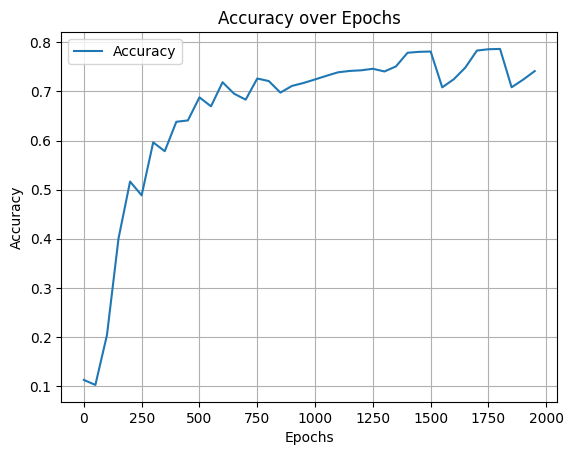

In [ ]:
import matplotlib.pyplot as plt

# Number of epochs (assuming accuracies contains accuracy for each epoch)
epochs = len(accuracies)

# Create x-axis values (epochs)
x = list(range(0, epochs * 50, 50))

# Plot accuracies
plt.plot(x, accuracies, label='Accuracy')

# Add labels and title
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy over Epochs')

# Add grid
plt.grid(True)

# Show legend
plt.legend()

# Show plot
plt.show()


In [ ]:
random_index = 12
print("True: ", test_y[random_index])

# Extract the individual data point from your dataset
individual_sample = test_X[:, random_index].reshape(-1, 1)  # Assuming X is your dataset

# Get the prediction for the individual sample using the trained model
prediction = nn.predict(individual_sample)

# Print the predicted class label
print("Predicted Class Label:", prediction)

True:  9
Predicted Class Label: [9]


In [ ]:
# nn.save_model('neuralNetwork_784_128_10_v2.h5', accuracies)